# Find co-expressed accessory genes

From the [core-acc analysis](../5_core_acc_analysis/stable_gene_relationships.ipynb) we observed that least stable core genes tended to be highly co-expressed with more accessory genes compared to the most stable core genes. Therefore, this notebook reports the accessory genes that the least core genes are most co-expressed with.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
from scripts import utils, paths, gene_relationships, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User params
use_operon = True

### Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_RAW
pa14_corr_filename = paths.PA14_CORR_RAW

pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)
pa14_corr = pd.read_csv(pa14_corr_filename, sep="\t", index_col=0, header=0)

In [4]:
# Make a dataframe with gene ids
pao1_membership = pd.DataFrame(data=[], index=pao1_corr.index)
print(pao1_membership.shape)
pao1_membership.head()

(5563, 0)


""
PA0001
PA0002
PA0003
PA0004
PA0005


In [5]:
pa14_membership = pd.DataFrame(data=[], index=pa14_corr.index)
print(pa14_membership.shape)
pa14_membership.head()

(5887, 0)


""
PA14_55610
PA14_55600
PA14_55590
PA14_55580
PA14_55570


### Load and get least stable core genes

In [6]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = "pao1_similarity_scores.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [7]:
# Get most and least stable core genes
pao1_least_stable_genes = list(
    pao1_similarity_scores[pao1_similarity_scores["label"] == "least stable"].index
)

pa14_least_stable_genes = list(
    pa14_similarity_scores[pa14_similarity_scores["label"] == "least stable"].index
)

### Load core/accessory gene labels

In [8]:
# Read in expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

In [9]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 530


In [10]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

In [11]:
pao1_membership.loc[pao1_core, "core/acc"] = "core"
pao1_membership.loc[pao1_acc, "core/acc"] = "acc"

In [12]:
# pa14_acc_shared = set(pa14_acc).intersection(pa14_gene_module_labels.index)
pa14_membership.loc[pa14_core, "core/acc"] = "core"
pa14_membership.loc[pa14_acc, "core/acc"] = "acc"

In [13]:
# Drop "module id" column
pao1_arr = pao1_membership
pa14_arr = pa14_membership

In [14]:
# Make sure to sort by gene id
# NOTE PA14 gene ids don't increment by 1, but by 10 or 20 are we missing some genes?
pao1_arr = pao1_arr.sort_index()
pa14_arr = pa14_arr.sort_index()

### Load operon annotations

In [15]:
pao1_operon_filename = paths.PAO1_OPERON
pa14_operon_filename = paths.PA14_OPERON

In [16]:
pao1_operon = annotations.load_format_operons(pao1_operon_filename)
pa14_operon = annotations.load_format_operons(pa14_operon_filename)

In [17]:
if use_operon:
    pao1_operon_expression_to_use = pao1_operon
    pa14_operon_expression_to_use = pa14_operon
else:
    pao1_operon_expression_to_use = None
    pa14_operon_expression_to_use = None

### Find all accessory genes co-expressed lasR gene

Our collaborator shared an experiment comparing the transcriptome of WT vs lasR mutant strains and found genes in PA14-only genes that were significant. So we were curious to see if any of these PA14-only DEGs (genes highlighted in red that were provided) were co-regulated by lasR according to our analysis.

In [18]:
pa14_lasR_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    ["PA14_45960"],
    pa14_arr,
    40,
    pa14_operon_expression_to_use,
)

In [19]:
print(pa14_lasR_acc_relationships.shape)
pa14_lasR_acc_relationships.head()

(1, 1)


,Related acc genes
gene id,
PA14_45960,"[PA14_59610, PA14_28850, PA14_35750, PA14_5509..."


In [20]:
# Read in PA14-only lasR genes
pa14_lasR_genes_Deb_filename = os.path.join(
    paths.LOCAL_DATA_DIR, "lasR regulated PA14 genes for Alex.csv"
)

In [21]:
pa14_lasR_genes_Deb = pd.read_csv(pa14_lasR_genes_Deb_filename, index_col=0, header=1)

In [22]:
print(pa14_lasR_genes_Deb.shape)
pa14_lasR_genes_Deb.head()

(78, 29)


,PAO1 ID,PA14_WT - Expression values,PA14_WT - Normalized expression values,PA14_WT - RPKM,PA14_delta lasR - Expression values,PA14_delta lasR - Normalized expression values,PA14_delta lasR - RPKM,PA14_P117L - Expression values,PA14_P117L - Normalized expression values,PA14_P117L - RPKM,...,PA14_WT - RPKM.1,PA14_delta lasR - RPKM.1,PA14_I215S - RPKM.1,PA14_lasR revert - RPKM.1,Unnamed: 24,PAO1 ID.2,PA14_WT - RPKM.2,PA14_delta lasR - RPKM.2,PA14_I215S - RPKM.2,PA14_lasR revert - RPKM.2
Feature ID,,,,,,,,,,,,,,,,,,,,,
PA14_28360,PA14_28360,586,504.2,505.257985,29,25.6,21.551879,11,23.4,19.686255,...,31.424530,32.674835,19.066339,37.677177,NaN,PA0346,4.973819,5.030108,4.252956,5.235619
PA14_36480,PA14_36480,258,214.2,210.427064,16,13.8,11.247952,22,46.0,37.244267,...,49.452202,34.904934,37.088113,47.060010,NaN,PA0080,5.627963,5.125359,5.212885,5.556430
PA14_36860,PA14_36860,122,100.8,116.878032,12,10.2,9.908910,7,15.2,13.919575,...,36.063543,34.949615,30.677617,35.414214,NaN,PA5532,5.172469,5.127205,4.939114,5.146257
PA14_36790,PA14_36790,63,51.8,84.497069,6,5.2,6.936237,0,0.4,0.000000,...,28.410372,34.915517,22.232095,27.816619,NaN,phoR,4.828346,5.125796,4.474572,4.797875
PA14_30890,PA14_30890,3,1.6,3.772191,0,0.0,0.000000,1,3.0,2.609920,...,37.289849,33.229769,22.325531,39.892994,NaN,PA1760,5.220711,5.054404,4.480623,5.318063


In [23]:
print(len(list(pa14_lasR_genes_Deb.index)))
shared_genes = set(pa14_lasR_genes_Deb.index).intersection(pa14_corr.index)
print(len(shared_genes))

78
55


In [24]:
# Format df for plotting
lasR_corr = pa14_corr.loc["PA14_45960"].to_frame("values")
lasR_corr["label"] = ""
lasR_corr.loc[pa14_acc, "label"] = "acc"
lasR_corr.loc[shared_genes, "label"] = "experiment DEGs"

In [25]:
lasR_corr.head()

,values,label
PA14_55610,-0.149626,
PA14_55600,-0.188335,
PA14_55590,-0.160599,
PA14_55580,0.199039,
PA14_55570,0.422267,


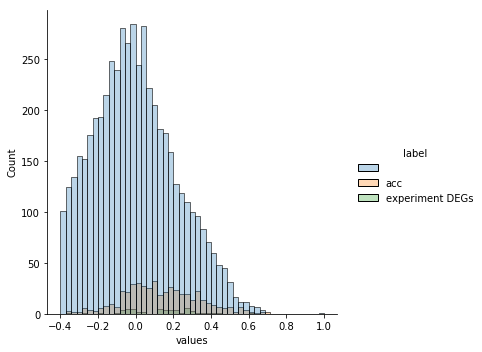

In [26]:
# Plot distribution of correlation scores
fig_pao1 = sns.displot(
    data=lasR_corr,
    x="values",
    hue="label",
    alpha=0.3,
    bins=np.linspace(-0.4, 1.0, 50),
)

In [27]:
# Let's try looking at genes within the same module as lasR
cluster_method = "affinity"
gene_subset = "all"
processed = "raw"
pa14_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_modules_{cluster_method}_{gene_subset}_{processed}.tsv"
)

In [28]:
pa14_membership = pd.read_csv(pa14_membership_filename, sep="\t", index_col=0, header=0)

In [29]:
pa14_membership.head()

,module id
PA14_55610,69
PA14_55600,69
PA14_55590,69
PA14_55580,28
PA14_55570,97


In [30]:
lasR_module_id = pa14_membership.loc["PA14_45960"].values[0]
print(lasR_module_id)

178


In [31]:
# Get genes in the same module as lasR
lasR_coexpression_module_genes = pa14_membership[
    pa14_membership["module id"] == lasR_module_id
].index

In [32]:
# Compare gene lists
set(pa14_lasR_genes_Deb.index).intersection(lasR_coexpression_module_genes)

set()

If we look at the distribution of co-expression scores for lasR vs all genes, accessory genes, Deb’s genes, the correlation scores range from (-0.2, 0.2), which is lower compared to other core genes. The lasR accessory (PA14-only) genes are found starting in the top 40 genes.

If we cluster correlation matrix that includes all genes (core and accessory), there are 0 genes that are within the lasR cluster and found in Deb’s genes (highlighted ones only ~80).


### Find all accessory genes co-expressed with least stable core genes

In [33]:
%%time
pao1_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pao1_corr,
    pao1_least_stable_genes,
    pao1_arr,
    10,
    pao1_operon_expression_to_use,
)

CPU times: user 2min 30s, sys: 11.6 ms, total: 2min 30s
Wall time: 2min 30s


In [34]:
pao1_least_acc_relationships.head()

,Related acc genes
gene id,
PA3318,[PA2336]
PA1565,No accessory genes
PA2109,No accessory genes
PA4075,No accessory genes
PA0333,No accessory genes


In [35]:
%%time
pa14_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    pa14_least_stable_genes,
    pa14_arr,
    10,
    pa14_operon_expression_to_use,
)

CPU times: user 2min 39s, sys: 116 ms, total: 2min 39s
Wall time: 2min 39s


In [36]:
pa14_least_acc_relationships.head()

,Related acc genes
gene id,
PA14_06250,"[PA14_22260, PA14_22240]"
PA14_56660,"[PA14_30850, PA14_61180]"
PA14_02730,[PA14_39700]
PA14_00480,No accessory genes
PA14_46480,"[PA14_59280, PA14_59890, PA14_59320, PA14_58950]"


### Add accessory gene list to core-core annotation df

In [37]:
# Load current core-core annotations
pao1_core_stable_similarity_filename = "pao1_core_similarity_associations.tsv"
pa14_core_stable_similarity_filename = "pa14_core_similarity_associations.tsv"

In [38]:
pao1_all_associations = pd.read_csv(
    pao1_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)
pa14_all_associations = pd.read_csv(
    pa14_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)

In [39]:
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(5349, 13)
(5348, 13)


In [40]:
# Merge KEGG associations with transcriptional similarity information
pao1_all_associations = pao1_all_associations.merge(
    pao1_least_acc_relationships, left_index=True, right_index=True, how="left"
)
pa14_all_associations = pa14_all_associations.merge(
    pa14_least_acc_relationships, left_index=True, right_index=True, how="left"
)

In [41]:
# Check that the dimension is consistent before and after merge
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(5349, 14)
(5348, 14)


In [42]:
pao1_all_associations.head()

,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,comparison,median expression,mean expression,variance expression,max expression,min expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,
PA0984,PA14_59230,0.469691,9.403422e-292,NaN,NaN,NaN,62.749935,107.274133,16325.080802,16325.080802,0.057625,16325.023177,[],NaN
PA0680,PA14_55500,0.672592,0.000000e+00,hxcV,NaN,NaN,6.137738,12.204957,457.854387,467.814754,0.140207,467.674547,['KEGG-Pathway-pae03070: Bacterial secretion s...,NaN
PA0847,PA14_53310,0.767508,0.000000e+00,NaN,NaN,NaN,187.968728,220.086486,16272.269787,16272.269787,36.746207,16235.523580,[],NaN
PA0164,PA14_02050,0.703763,0.000000e+00,NaN,NaN,NaN,107.041218,138.139287,14123.774503,14123.774503,10.463200,14113.311303,['KEGG-Pathway-pae00480: Glutathione metabolis...,NaN
PA1160,PA14_49400,0.228437,2.819471e-64,NaN,NaN,NaN,137.427645,155.403740,10623.810909,10623.810909,1.905517,10621.905392,[],NaN


In [43]:
pao1_all_associations.sort_values(by="label").head()

,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,comparison,median expression,mean expression,variance expression,max expression,min expression,range expression,pathways present,Related acc genes
PAO1 id,,,,,,,,,,,,,,
PA0545,PA14_07070,0.106841,4.702517e-15,NaN,least stable,least stable in counts,249.401790,523.854092,8.959710e+05,8.959710e+05,6.056271,8.959649e+05,[],No accessory genes
PA2242,PA14_35600,-0.291216,4.756167e-105,pslL,least stable,least stable in counts,172.687609,268.792374,9.345955e+04,9.345955e+04,0.156487,9.345939e+04,[],[PA3158]
PA2773,PA14_28220,-0.050152,2.430963e-04,NaN,least stable,least stable in counts,42.814158,54.166252,1.954075e+03,1.954075e+03,2.815570,1.951259e+03,[],No accessory genes
PA0544,PA14_07060,0.109911,7.559062e-16,NaN,least stable,least stable in counts,105.547847,134.269581,1.820213e+04,1.820213e+04,12.293408,1.818984e+04,[],No accessory genes
PA1939,PA14_60070,0.160737,2.729891e-32,NaN,least stable,least stable in both,1144.711228,1684.175236,5.940741e+06,5.940741e+06,0.062196,5.940741e+06,[],"[PA2732, PA2730]"


In [44]:
pa14_all_associations.sort_values(by="label").head()

,PAO1 homolog id,Transcriptional similarity across strains,P-value,Name,label,comparison,median expression,mean expression,variance expression,max expression,min expression,range expression,pathways present,Related acc genes
PA14 id,,,,,,,,,,,,,,
PA14_06250,PA0478,0.191827,1.697937e-45,NaN,least stable,least stable in both,49.936764,59.458793,2.266283e+03,2.266283e+03,4.448916,2.261834e+03,[],"[PA14_22260, PA14_22240]"
PA14_53200,PA0856,0.134168,6.587268e-23,NaN,least stable,least stable in counts,1025.294401,1568.300010,2.968748e+07,2.968748e+07,67.761081,2.968741e+07,[],[PA14_28250]
PA14_49300,PA1169,0.192431,8.885760e-46,NaN,least stable,least stable in counts,143.714331,300.762435,3.693396e+05,3.693396e+05,19.581424,3.693200e+05,[],No accessory genes
PA14_38320,PA2026,0.155539,2.590166e-30,NaN,least stable,least stable in counts,134.257162,198.297392,5.604500e+04,5.604500e+04,0.448216,5.604455e+04,[],"[PA14_33360, PA14_51570]"
PA14_60770,PA4592,0.056940,3.094512e-05,NaN,least stable,least stable in counts,136.382355,152.586737,6.686992e+03,6.686992e+03,11.280972,6.675711e+03,[],No accessory genes


In [45]:
# TO DO: Remove 'compare' when we decide which input to use
# Save
pao1_all_associations.to_csv(
    "pao1_core_similarity_associations_final_compare.tsv", sep="\t"
)
pa14_all_associations.to_csv(
    "pa14_core_similarity_associations_final_compare.tsv", sep="\t"
)

Based on the results, there are some accessory genes that are shared by 4-5 core genes, most of these are uncharacterized by uniprot: one is integrase catalytic domain, GGDEF domain proteins.

What threshold makes sense for looking at the top # co-expressed accessory genes?
